In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
import numpy as np

x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

y_train = keras.utils.to_categorical(y_train,num_classes = 10)
y_test = keras.utils.to_categorical(y_test,num_classes = 10)

In [5]:
len(x_train)

60000

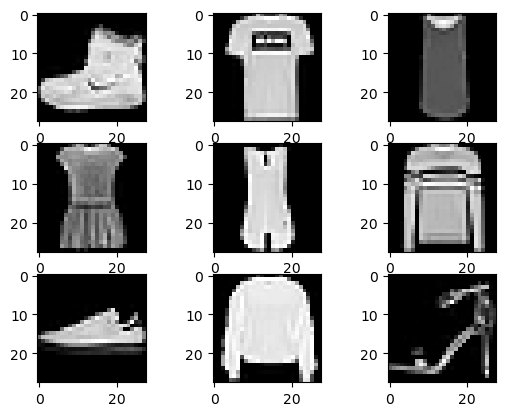

In [6]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(32,(3,3),input_shape = (28,28,1),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation = 'softmax')
])

model.summary()

In [7]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [8]:
model.fit(x_train,y_train,batch_size = 128,epochs = 50)

Epoch 1/50
469/469 [==============================] - 14s 29ms/step - loss: 0.4415 - accuracy: 0.8461
Epoch 2/50
469/469 [==============================] - 13s 29ms/step - loss: 0.2945 - accuracy: 0.8948
Epoch 3/50
469/469 [==============================] - 13s 29ms/step - loss: 0.2533 - accuracy: 0.9081
Epoch 4/50
469/469 [==============================] - 13s 29ms/step - loss: 0.2263 - accuracy: 0.9185
Epoch 5/50
469/469 [==============================] - 14s 30ms/step - loss: 0.2029 - accuracy: 0.9265
Epoch 6/50
469/469 [==============================] - 14s 31ms/step - loss: 0.1821 - accuracy: 0.9340
Epoch 7/50
469/469 [==============================] - 14s 31ms/step - loss: 0.1674 - accuracy: 0.9392
Epoch 8/50
469/469 [==============================] - 14s 31ms/step - loss: 0.1509 - accuracy: 0.9455
Epoch 9/50
469/469 [==============================] - 14s 29ms/step - loss: 0.1390 - accuracy: 0.9491
Epoch 10/50
469/469 [==============================] - 14s 29ms/step - loss: 0.125

In [9]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6520 - accuracy: 0.9134


In [10]:
accuracy

0.9133999943733215

In [11]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [12]:
import h5py
model.save('CNN_final_model.h5')

In [75]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

def image_classify(filename):
    img = load_img(filename,grayscale=True, target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1,28,28,1)
    img = img.astype(np.float32)/255
    
    model = load_model('CNN_final_model.h5')
    array_pred =  model.predict(img)
    array_pred = np.argsort(-array_pred)
    return array_pred[0][0]        

In [77]:
image_classify(r'C:\Users\karu0\Machine Learning\PRACTICE\PRACTICALS\sample.png')


1/1 [==============================] - 0s 42ms/step


8

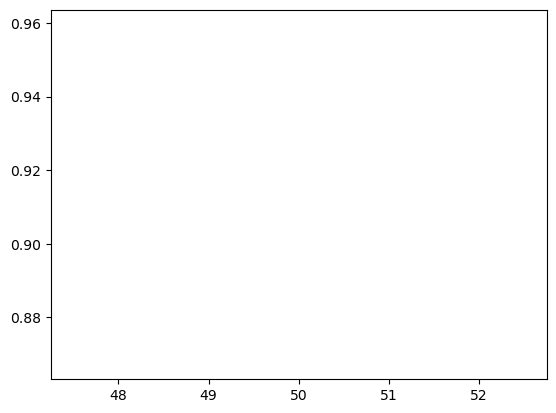

In [79]:
plt.plot(50,accuracy)